# Notebook for computing the anchors to each of the classes in the datasaet.
We will calculate by K-Means the optimal anchors to each class

In [19]:
# IMPORTS

import random
import argparse
import numpy as np
import json
import utils 
import os

In [20]:
# Configuration

data_root = os.path.join(".", "DATA")
current_class = "starfish"
data_root_tmp = data_root
path_train_imgs = os.path.join(data_root_tmp, "process_tmp_folder" ,"images_slice")
path_train_annot = os.path.join(data_root_tmp, "process_tmp_folder", "labels_slice")

input_size = 416
labels = [current_class]
num_anchors = 9
num_executions = 150


# Automated Proposed anchors

best_avg_iou = 0

for i in range(num_executions):
    centroids, annot_dim, avg_iou = utils.gen_anchors(path_train_imgs,path_train_annot,input_size,labels,num_anchors)

    if best_avg_iou < avg_iou:

        best_avg_iou = avg_iou
        best_centroids = centroids
        best_annot_dim = annot_dim

        print("Best results on ", i, " score: ", '%0.2f' % avg_iou)
        utils.print_anchors(centroids)

In [21]:
best_centroids, best_annot_dim, best_avg_iou = utils.gen_anchors(
    path_train_imgs,
    path_train_annot,
    input_size,labels,
    num_anchors, 
    num_executions,
    verbose = True)



Best results on  0  score:  0.835
Distance : 28.083290460441937
anchors: [[27.85,23.57], [34.80,33.88], [42.39,37.39], [42.40,28.74], [44.63,55.00], [49.64,44.88], [66.81,56.45], [67.16,38.74], [93.43,77.08]]
Best results on  1  score:  0.840
Distance : 35.46111186537397
anchors: [[26.59,24.10], [36.76,34.58], [40.21,27.74], [44.62,44.54], [58.24,53.35], [59.78,35.24], [76.48,46.82], [79.79,68.09], [108.71,89.54]]
Best results on  3  score:  0.846
Distance : 35.12919049137175
anchors: [[20.47,18.87], [29.68,27.41], [39.41,33.59], [40.52,22.67], [44.64,44.80], [58.06,53.03], [66.77,39.25], [78.59,61.97], [98.55,85.32]]
Best results on  5  score:  0.847
Distance : 35.418798339557036
anchors: [[19.89,17.82], [28.96,26.88], [39.14,33.47], [40.50,22.69], [44.67,44.75], [58.10,53.19], [66.73,39.24], [78.85,61.72], [98.10,85.26]]
Best results on  17  score:  0.847
Distance : 34.41798592432854
anchors: [[20.38,18.98], [32.06,25.13], [35.14,34.85], [43.26,31.59], [45.07,44.79], [58.21,53.23], [

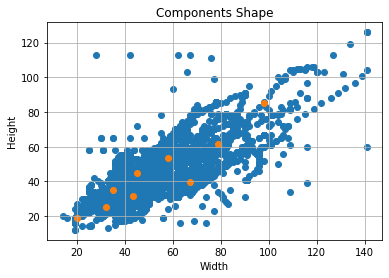

In [22]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots()

ax.set_xlabel(r'Width', fontsize=10)
ax.set_ylabel(r'Height', fontsize=10)
ax.set_title('Components Shape')

ax.grid(True)

ax.scatter(best_annot_dim[:,0], best_annot_dim[:,1])
ax.scatter(best_centroids[:,0], best_centroids[:,1])

plt.show()

# Set Anchors and final IOU

In [23]:
scale1 = input_size / 13
print("Scale 1=%d"%scale1)
scale2 = input_size / 26
print("Scale 2=%d"%scale2)
scale3 = input_size / 52
print("Scale 3=%d"%scale3)
scale4 = input_size / 104
print("Scale 3=%d"%scale4)


Scale 1=32
Scale 2=16
Scale 3=8
Scale 3=4


In [27]:

# Anchors Definition
yolo_anchors = np.array([[20,  19], [32, 25], [35, 35],
                         [43,  32], [45, 45], [58, 53],
                         [67,  40], [79, 62], [98, 85]])

print(yolo_anchors.shape)

(9, 2)


In [30]:
avg_iou = utils.avg_IOU(best_annot_dim, yolo_anchors)

print("Final score: ", '%0.4f' % avg_iou)

Final score:  0.8476


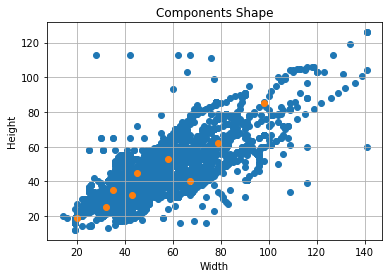

In [31]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots()

ax.set_xlabel(r'Width', fontsize=10)
ax.set_ylabel(r'Height', fontsize=10)
ax.set_title('Components Shape')

ax.grid(True)

ax.scatter(best_annot_dim[:,0], best_annot_dim[:,1])
ax.scatter(yolo_anchors[:,0], yolo_anchors[:,1])


x1, y1 = [scale1, 0], [scale1, scale1]

x2, y2 = [scale2, 0], [scale2, scale2]

x3, y3 = [scale3, 0], [scale3, scale3]

#ax.plot(x1, y1, x2, y2, x3, y3,marker = 'o')

plt.show()